In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data cleaning

In [4]:
## Missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
## Datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
df.drop(['id', 'date'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


# Visualization

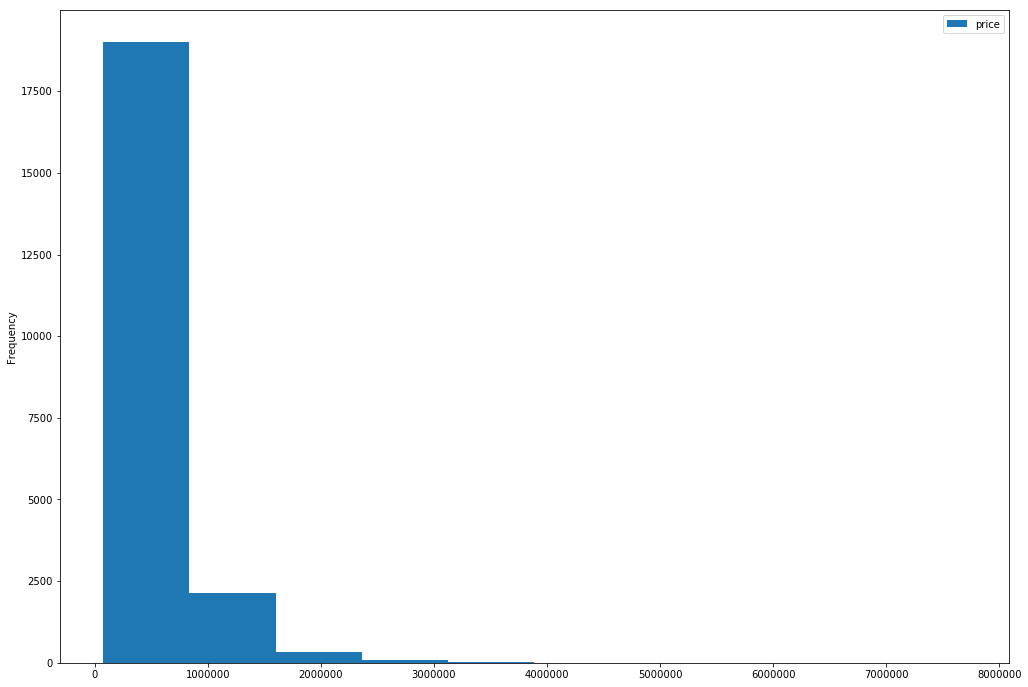

In [8]:
fig, ax = plt.subplots(figsize=(17,12))
df[["price"]].plot.hist(ax=ax)

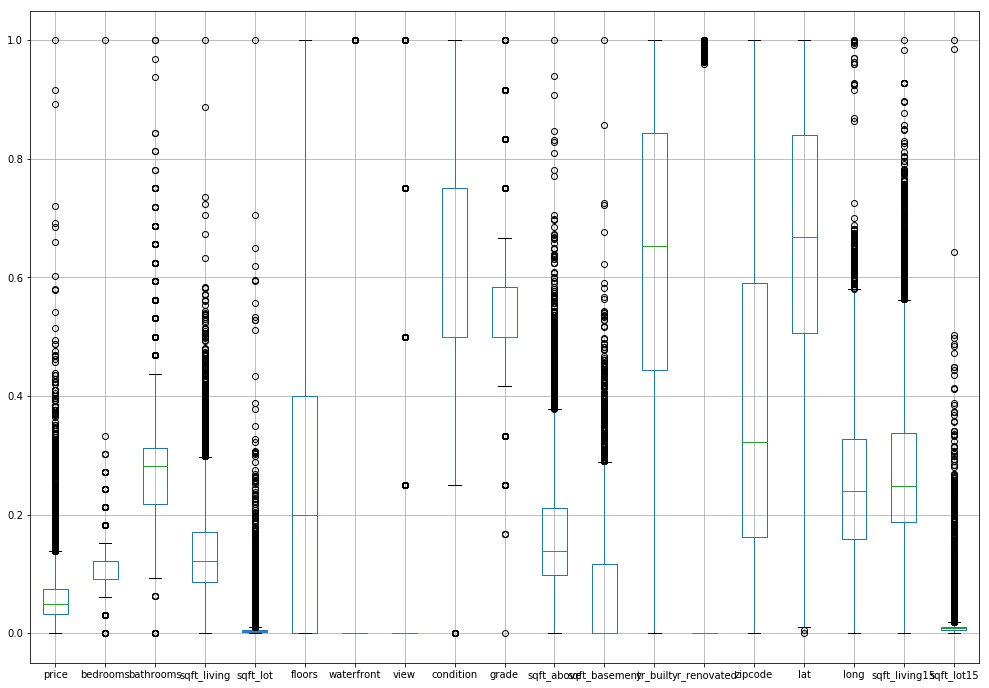

In [9]:
df_box = df.copy()

for col in df_box.columns:
    df_box[col] = (df_box[col] - df_box[col].min())/(df_box[col].max() - df_box[col].min())


fig, ax = plt.subplots(figsize=(17,12))
df_box.plot.box(ax=ax)
# ax.set_yticks(np.linspace(df['price'].min(), df['price'].max(), 20))
ax.grid()

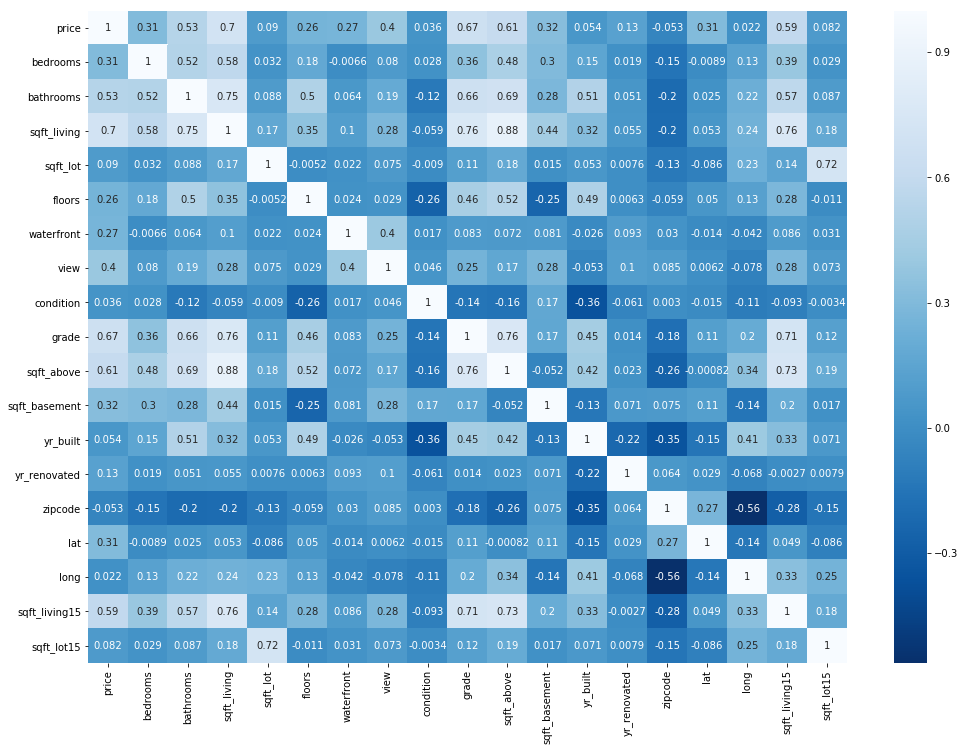

In [10]:
fig, ax = plt.subplots(figsize=(17,12))
sns.heatmap(df.corr(), ax=ax, annot=True, cmap="Blues_r")

In [11]:
df.drop(['sqft_living', 'sqft_living15'], axis=1, inplace=True)

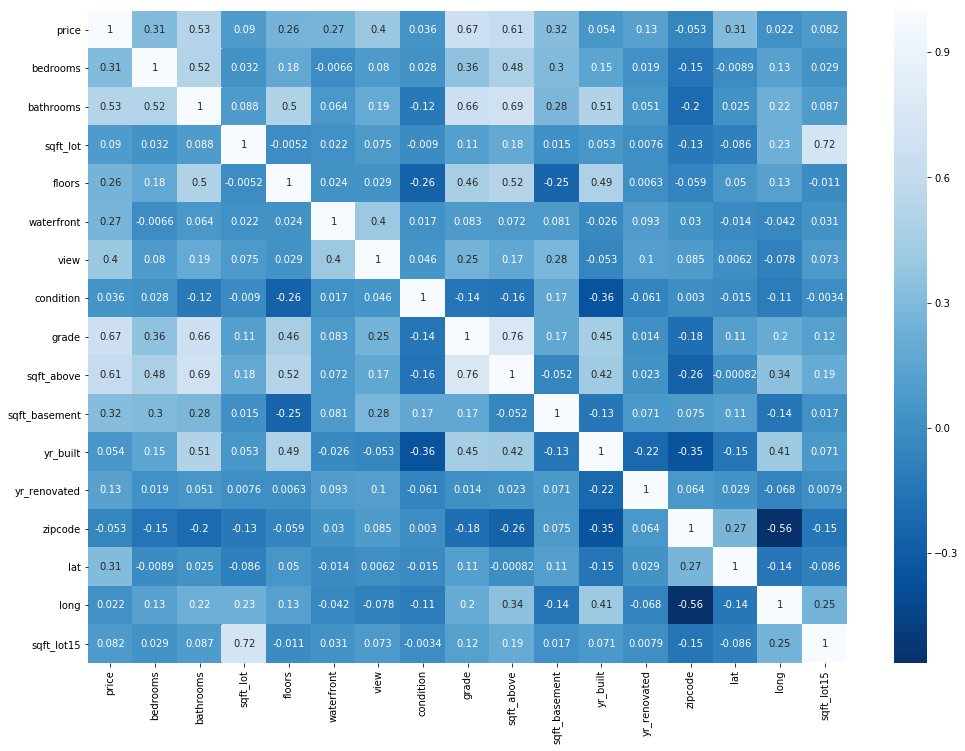

In [12]:
fig, ax = plt.subplots(figsize=(17,12))
sns.heatmap(df.corr(), ax=ax, annot=True, cmap="Blues_r")

In [13]:
df.loc[df['yr_renovated'] == 0, 'is_renovated'] = 0
df.loc[df['yr_renovated'] != 0, 'is_renovated'] = 1

In [14]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']
df.drop('yr_built', axis=1, inplace=True)

In [15]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_lot15,is_renovated
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,5650,0.0
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,7639,1.0
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,8062,0.0
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,5000,0.0
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,7503,0.0


In [30]:
from sklearn.preprocessing import LabelEncoder

zip_le = LabelEncoder()
df['zipcode'] = zip_le.fit_transform(df['zipcode'])
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_lot15,is_renovated
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,66,47.5112,-122.257,5650,0.0
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1991,55,47.7210,-122.319,7639,1.0
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,16,47.7379,-122.233,8062,0.0
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,58,47.5208,-122.393,5000,0.0
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,37,47.6168,-122.045,7503,0.0


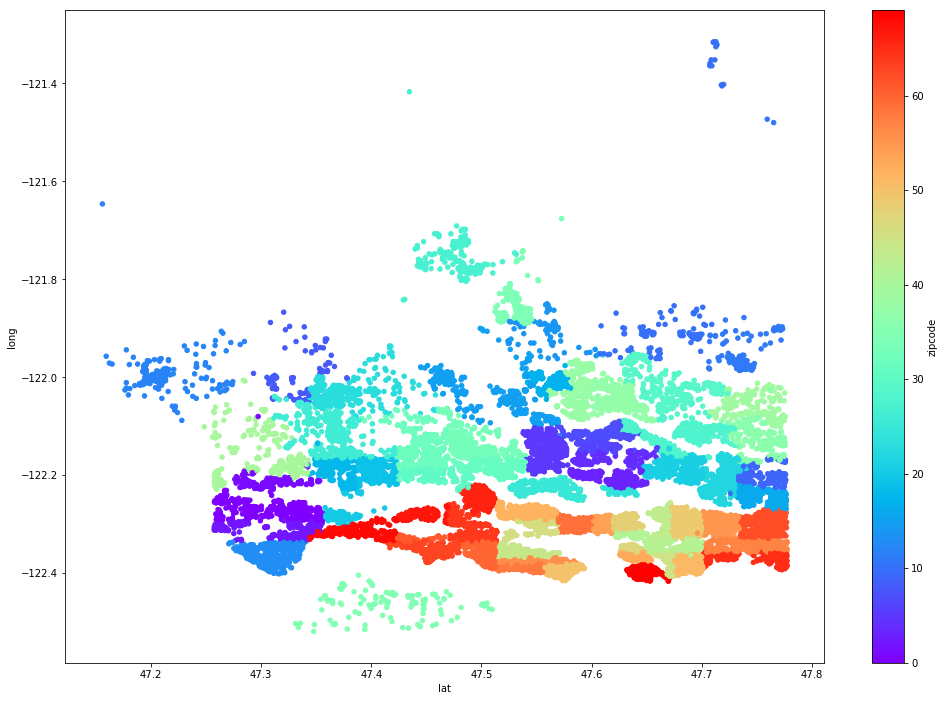

In [31]:
fig, ax = plt.subplots(figsize=(17,12))
df.plot.scatter(x="lat", y="long", ax=ax, c="zipcode", cmap="rainbow")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_lot15       21613 non-null int64
is_renovated     21613 non-null float64
dtypes: float64(6), int64(11)
memory usage: 2.8 MB


# Modeling

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import PolynomialFeatures

In [40]:
X_columns = list(df.columns)
X_columns.remove('price')
X = df[X_columns].values
Y = df['price'].values

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [68]:
params = {
    "fit_intercept": [True, False],
    "normalize": [True, False],
}

## Multilinear regression

In [71]:
model = LinearRegression()
gc = GridSearchCV(model, params)
gc = gc.fit(X_train, Y_train)
gc.best_params_

{'fit_intercept': True, 'normalize': True}

In [72]:
Y_pred = gc.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean squared error = ", mse)
print(f"R² = {r2*100:.2f}%")

Mean squared error =  38530866491.90585
R² = 68.14%


## Polynomial regression

In [86]:
pol = PolynomialFeatures(degree = 2)
X_train_pol = pol.fit_transform(X_train)
X_test_pol = pol.fit_transform(X_test)
X_train_pol.shape

(17290, 153)

In [87]:
model = LinearRegression()
gc = GridSearchCV(model, params)
gc = gc.fit(X_train_pol, Y_train)
gc.best_params_

{'fit_intercept': True, 'normalize': True}

In [88]:
Y_pred_pol = gc.predict(X_test_pol)
mse = mean_squared_error(Y_test, Y_pred_pol)
r2 = r2_score(Y_test, Y_pred_pol)
print("Mean squared error = ", mse)
print(f"R² = {r2*100:.2f}%")

Mean squared error =  24755666315.39898
R² = 79.53%
